<a href="https://colab.research.google.com/github/sorongtechone/Deep-Learning/blob/main/klasifikasi_ikan_M3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!mkdir /content/ikan

In [3]:
cp /content/drive/MyDrive/sip/archive.zip /content/ikan

In [ ]:
!unzip /content/ikan/archive.zip -d /content/ikan

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
from keras.optimizers import Adam
from pathlib import Path
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D

In [7]:
dataset_path = Path(r'/content/ikan/Fish_Dataset/Fish_Dataset')
file_path = list(dataset_path.glob(r'**/*.png'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], file_path))

In [8]:
file_path = pd.Series(file_path).astype(str)
labels = pd.Series(labels)
df = pd.concat([file_path, labels], axis=1)
df.columns = ['image', 'label']
df.head()

,image,label
0,/content/ikan/Fish_Dataset/Fish_Dataset/Sea Ba...,Sea Bass
1,/content/ikan/Fish_Dataset/Fish_Dataset/Sea Ba...,Sea Bass
2,/content/ikan/Fish_Dataset/Fish_Dataset/Sea Ba...,Sea Bass
3,/content/ikan/Fish_Dataset/Fish_Dataset/Sea Ba...,Sea Bass
4,/content/ikan/Fish_Dataset/Fish_Dataset/Sea Ba...,Sea Bass


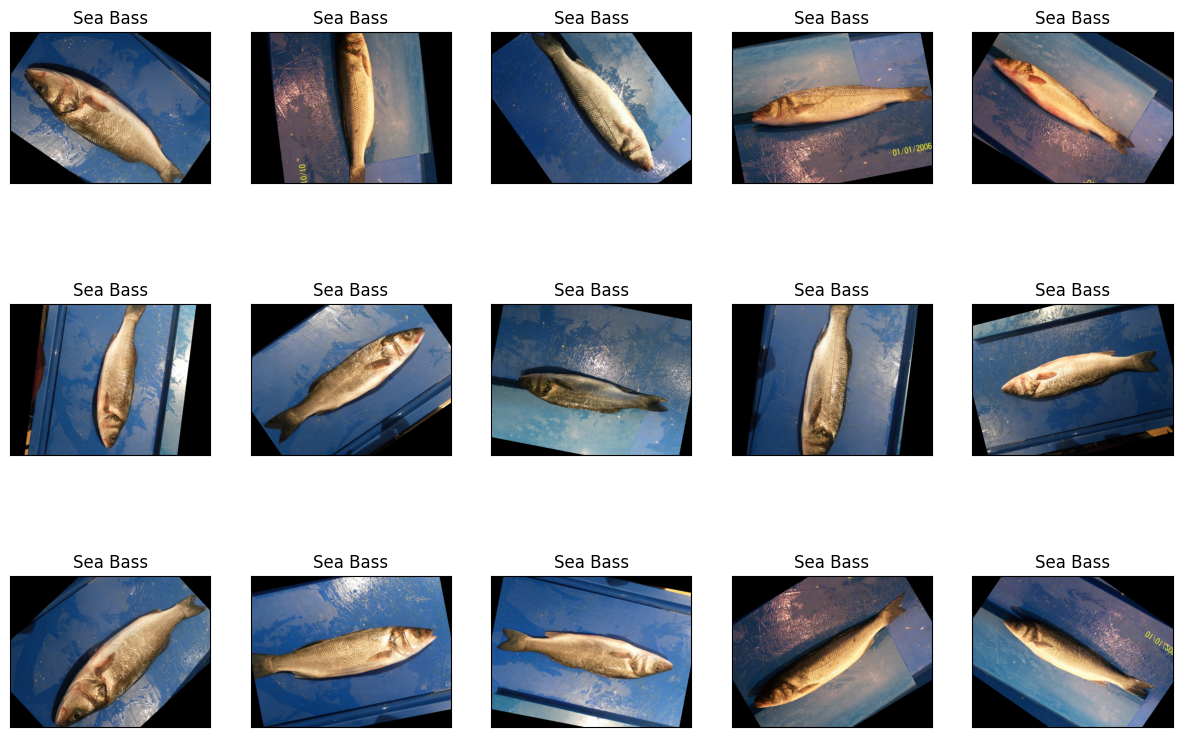

In [9]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15,10), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df.image[i]))
    ax.set_title(df.label[i])
    
plt.show()

In [10]:
df.label.value_counts()

Sea Bass                 1000
Sea Bass GT              1000
Black Sea Sprat GT       1000
Red Mullet               1000
Red Mullet GT            1000
Red Sea Bream            1000
Red Sea Bream GT         1000
Trout GT                 1000
Trout                    1000
Striped Red Mullet GT    1000
Striped Red Mullet       1000
Hourse Mackerel          1000
Hourse Mackerel GT       1000
Gilt-Head Bream          1000
Gilt-Head Bream GT       1000
Shrimp                   1000
Shrimp GT                1000
Black Sea Sprat          1000
Name: label, dtype: int64

In [11]:
df = df[df['label'].apply(lambda x: x[-2:] != 'GT')].reset_index(drop=True)
df.label.value_counts()

Sea Bass              1000
Shrimp                1000
Gilt-Head Bream       1000
Hourse Mackerel       1000
Striped Red Mullet    1000
Trout                 1000
Red Sea Bream         1000
Red Mullet            1000
Black Sea Sprat       1000
Name: label, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test = train_test_split(df, test_size=0.3,random_state=30)
x_train, x_val = train_test_split(x_train, test_size=0.2, random_state=30)

In [14]:
print("Shape of training data", x_train.shape)
print("Shape of test data", x_test.shape)
print("Shape of validation data", x_val.shape)

Shape of training data (5040, 2)
Shape of test data (2700, 2)
Shape of validation data (1260, 2)


In [15]:
image_data_generator = ImageDataGenerator(rescale = 1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
train = image_data_generator.flow_from_dataframe(dataframe=x_train, x_col='image', y_col='label', target_size=(200,200), color_mode='rgb', class_mode='categorical', shuffle=False)
test = image_data_generator.flow_from_dataframe(dataframe=x_test, x_col='image', y_col='label', target_size=(200,200), color_mode='rgb', class_mode='categorical', shuffle=False)
val = image_data_generator.flow_from_dataframe(dataframe=x_val, x_col='image', y_col='label', target_size=(200,200), color_mode='rgb', class_mode='categorical',shuffle=False)

Found 5040 validated image filenames belonging to 9 classes.
Found 2700 validated image filenames belonging to 9 classes.
Found 1260 validated image filenames belonging to 9 classes.


In [17]:
input_shape = (200, 200, 3)

In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=input_shape ),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(9, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 32)       0

In [20]:
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=4)
history = model.fit(train, validation_data=val, epochs=5, callbacks=callback)

Epoch 1/5
158/158 [==============================] - 532s 3s/step - loss: 1.8413 - accuracy: 0.2675 - val_loss: 1.4579 - val_accuracy: 0.4286
Epoch 2/5
158/158 [==============================] - 563s 4s/step - loss: 1.3940 - accuracy: 0.4331 - val_loss: 1.6902 - val_accuracy: 0.3921
Epoch 3/5
158/158 [==============================] - 535s 3s/step - loss: 1.2512 - accuracy: 0.4990 - val_loss: 1.0950 - val_accuracy: 0.5698
Epoch 4/5
158/158 [==============================] - 580s 4s/step - loss: 1.0439 - accuracy: 0.5754 - val_loss: 0.9827 - val_accuracy: 0.6143
Epoch 5/5
158/158 [==============================] - 577s 4s/step - loss: 0.8887 - accuracy: 0.6524 - val_loss: 0.9416 - val_accuracy: 0.6286


In [21]:
model.save('model-1.h5')

In [22]:
accuracy = history.history['accuracy']
val_accuracy  = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

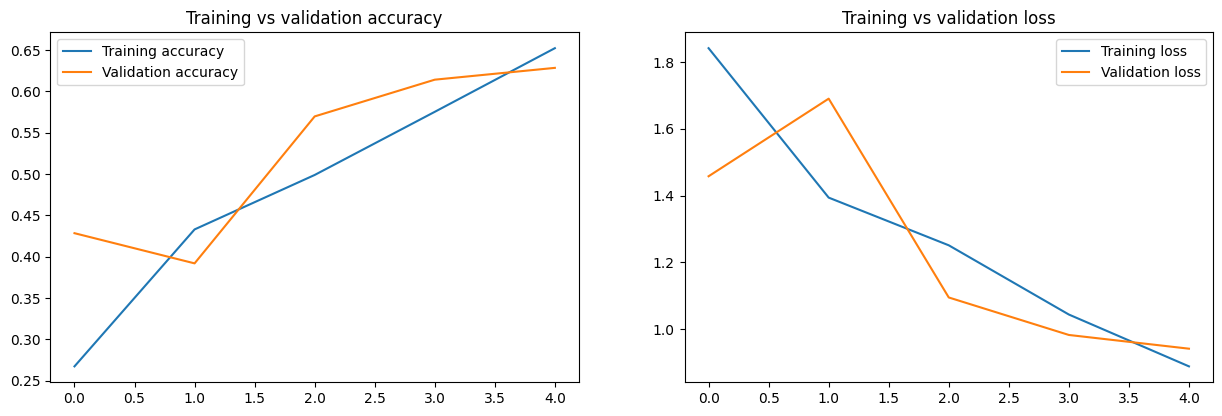

In [23]:
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
plt.plot(accuracy, label = "Training accuracy")
plt.plot(val_accuracy, label="Validation accuracy")
plt.legend()
plt.title("Training vs validation accuracy")
plt.subplot(2,2,2)
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label="Validation loss")
plt.legend()
plt.title("Training vs validation loss")
plt.show()

In [24]:
pred = model.predict(test)

85/85 [==============================] - 99s 1s/step


In [25]:
pred = np.argmax(pred, axis=1)

In [26]:
labels = train.class_indices

In [27]:
labels

{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

In [28]:
labels = dict((v,k) for k, v in labels.items())

In [29]:
labels

{0: 'Black Sea Sprat',
 1: 'Gilt-Head Bream',
 2: 'Hourse Mackerel',
 3: 'Red Mullet',
 4: 'Red Sea Bream',
 5: 'Sea Bass',
 6: 'Shrimp',
 7: 'Striped Red Mullet',
 8: 'Trout'}

In [30]:
y_pred = [labels[k] for k in pred]

In [31]:
print(classification_report(x_test.label, y_pred))

                    precision    recall  f1-score   support

   Black Sea Sprat       0.94      0.81      0.87       287
   Gilt-Head Bream       0.38      0.35      0.36       314
   Hourse Mackerel       0.95      0.42      0.58       290
        Red Mullet       1.00      0.93      0.96       293
     Red Sea Bream       0.50      0.53      0.52       291
          Sea Bass       0.26      0.31      0.28       305
            Shrimp       0.98      0.76      0.86       301
Striped Red Mullet       0.72      0.71      0.72       298
             Trout       0.53      0.92      0.68       321

          accuracy                           0.64      2700
         macro avg       0.69      0.64      0.65      2700
      weighted avg       0.69      0.64      0.64      2700



In [32]:
print(confusion_matrix(x_test.label, y_pred))

[[232   0   0   0   0  55   0   0   0]
 [  0 111   0   0  61  27   0   1 114]
 [ 11  17 121   0  14 113   0   0  14]
 [  0   0   0 273   0   0   0  20   0]
 [  1  33   1   0 154  10   0   0  92]
 [  3 105   5   0  55  95   0   5  37]
 [  0   0   0   0   1  16 228  56   0]
 [  1  10   1   1  21  47   4 213   0]
 [  0  19   0   0   0   7   0   0 295]]


In [33]:
test_accuracy = model.evaluate(test)[1]

85/85 [==============================] - 87s 1s/step - loss: 0.9018 - accuracy: 0.6430
